In [1]:
import os
import numpy as np
import pandas as po
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
base_path = '../data/processed/2017/'

In [3]:
files = os.listdir(base_path)
files.sort()
if '.DS_Store' in files:
    files.remove('.DS_Store')

In [4]:
len(files)

350

In [5]:
h = []
for i in range(24):
    h += [i]*12

In [6]:
m = list(range(0, 60, 5))*24

In [7]:
df_c = po.DataFrame()
df_c['h'] = h
df_c['m_b'] = m
#df_c = df_c.sort_values('h').reset_index(drop=True)

In [8]:
df_f = po.DataFrame()
for f in tqdm(files):
    df_t = po.read_csv(base_path+f).drop('Unnamed: 0', axis = 1)
    assert len(df_t['Date'].value_counts()) == 1
    date = df_t['Date'][0]
    df_t = df_t.sort_values(by = ['h', 'm']).reset_index(drop=True)
    df_t['m_b'] = po.cut(df_t['m'], bins = range(0, 61, 5), labels = range(0, 60, 5))
    df_t = po.DataFrame(df_t.groupby(['h', 'm_b']).mean()['W']).reset_index()
    df_m = df_t.merge(df_c, how='outer').sort_values(['h', 'm_b']).reset_index(drop=True)
    
    df_f = po.concat([df_f, df_m], axis = 0, ignore_index=True)

100%|██████████| 350/350 [00:46<00:00,  6.41it/s]


In [9]:
len(df_f)/288

350.0

In [10]:
len(df_f)

100800

In [11]:
df_f.isnull().sum()

h         0
m_b       0
W      8405
dtype: int64

In [12]:
#since there is consistent daily seasonality, I am imputing by taking the mean of the observations one day before and one day after

In [13]:
#use a seven day lookback/lookahead before and after the missing subsequence

for i in tqdm(range(288, len(df_f[288:]))):
    if np.isnan(df_f['W'][i]):
        df_f['W'][i] = (df_f['W'][i+288] + df_f['W'][i-288])/2

In [14]:
df_f.isnull().sum()

h         0
m_b       0
W      8405
dtype: int64

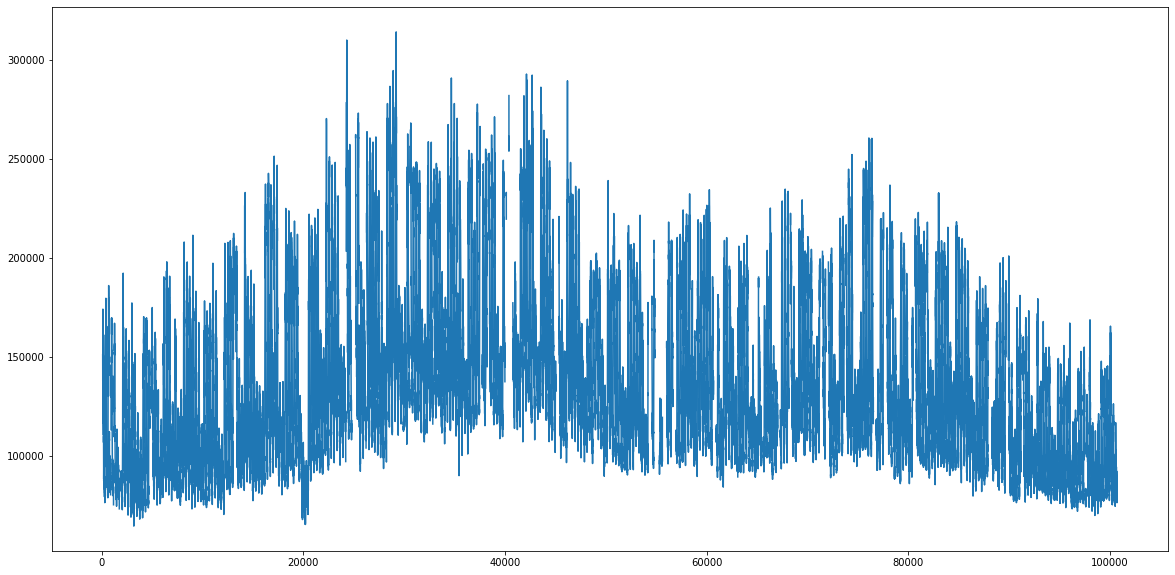

In [15]:
plt.figure(figsize=(20,10))
plt.plot(df_f['W'])

In [16]:
#Clear monthly seasonality

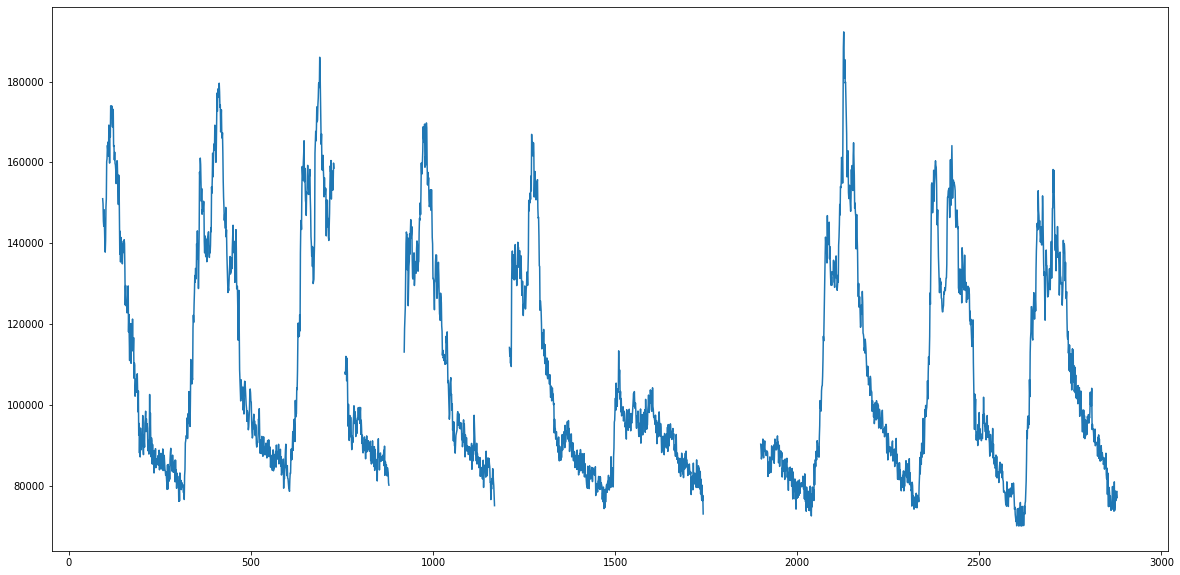

In [17]:
plt.figure(figsize=(20,10))
plt.plot(df_f['W'][:288*10])

In [18]:
#clear daily seasonality

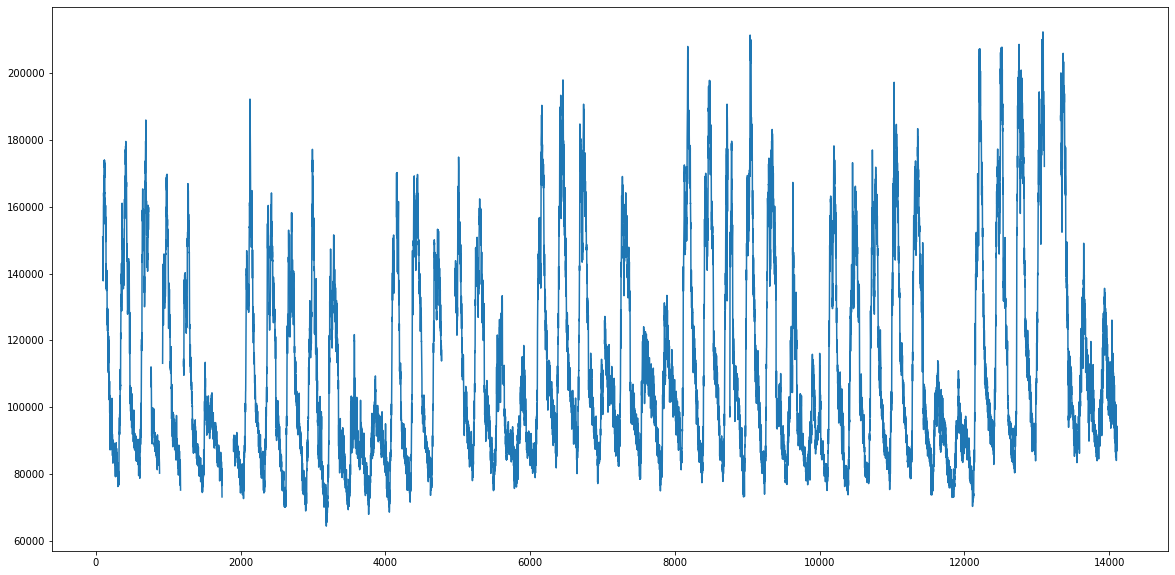

In [20]:
plt.figure(figsize=(20,10))
plt.plot(df_f['W'][:288*49])

In [32]:
#no weekly seasonality
#clear dip on weekends

In [23]:
df_f.to_csv('../data/processed/2017_cleaned_for_imputation.csv', index=False)

In [174]:
#po.set_option('display.max_rows', 10)
#po.set_option('display.max_rows', None)